# Regular solution free energy plot

*Authors: Enze Chen (University of California, Berkeley)*

![Regular solution model](https://raw.githubusercontent.com/enze-chen/learning_modules/master/fig/reg_solu.png)

This is a short interactive notebook that aims to teach you how to create (more or less) the same figure that is pictured above. You will have the opportunity to practice scientific computing and Python functions. If you are unfamiliar with the regular solution model, I cover it briefly below.

## How to run this notebook

If you are viewing this notebook on Google Colaboratory, then all the software is already set up for you (hooray). If you want to run the notebook locally, make sure all the Python libraries in the [`requirements.txt`](https://github.com/enze-chen/learning_modules/blob/master/requirements.txt) file are installed.

For pedagogical reasons, there are a few sections for you to complete the code in order to construct the resulting free energy curves. This is delineated with the dashed lines as follows, and you should **only change what's inside**. You don't have to edit the text or code anywhere else. I've also included "**TODO**" to separate the background context from the actual instructions.
```python
# ---------------------- #
# YOUR CODE HERE

# ---------------------- #
```
If you edit the code in a cell, just press `Shift+Enter` to run it again. You have to execute **all** the code cells in this notebook from top to bottom (so don't skip around). A number `[#]` will appear to the left of the code cell once it's done executing. When done successfully, you'll be able to generate a lens-shaped phase diagram at the very end.

## Acknowledgements
I thank Dr. Petr Johanes for teaching MATSCI 155: Nanomaterials Synthesis, and [Prof. Gerbrand Ceder](https://mse.berkeley.edu/people_new/ceder/) for teaching MATSCI 201A: Thermodynamics and Phase Transformations in Solids. I also thank my advisor [Prof. Mark Asta](https://mse.berkeley.edu/people_new/asta/) for suggesting this notebook, providing preliminary scripts and data, and encouraging me in my education-related pursuits. An interactive version of this notebook can be found online at [Google Colaboratory](https://colab.research.google.com/github/enze-chen/learning_modules/blob/master/mse/Regular_solution_plot.ipynb).

## Important equations

We know from thermodynamics that in general:

$$ \Delta G = \Delta H - T \Delta S$$

where $\Delta H$ is the enthalpy, $T$ is the temperature, and $\Delta S$ is the entropy. Hopefully this is ingrained in your head by now.

In the ideal solution model, we assume no interactions between the species, which means $\Delta H_{\text{mix}} = 0$ and we only have to account for the entropy of mixing:

$$ \Delta S_{\text{mix}} = -R \left[ x \ln x + (1-x) \ln(1-x) \right] $$

where $x$ is the atomic fraction of species $B$ in the $AB$ solution. One can derive this expression by starting from the configurational entropy in the [microcanonical ensemble](https://en.wikipedia.org/wiki/Microcanonical_ensemble) and apply [Stirling's approximation](http://hyperphysics.phy-astr.gsu.edu/hbase/Math/stirling.html). 

In the regular solution model, however, we have an interaction term in the enthalpy that in the simplest version is typically given by the product of the atomic fractions times a $\beta$ interaction parameter, such that:

$$ \Delta H_{\text{mix}} = \beta x(1-x) $$

where $\beta < 0$ favors mixing. Furthermore, we'll assume for this demo that the free energies of the pure phases are $0$ as a reference.

## Known issues
* It doesn't have great safeguards against numerical errors, which might happen if you put absurd quantities for the $\beta$ parameter. Please be gentle. ❤

## Python library imports

These are all the required Python libraries (so few!). We need [NumPy](https://numpy.org/) for the math and [Matplotlib](https://matplotlib.org/) for the plotting.

**TODO**: Run this cell with `Shift+Enter` before starting the others.

In [1]:
# Scientific computing libraries with standard abbreviations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Analytical function for the Gibbs free energy

Here you will write **a Python function** that will calculate and **return** $\Delta G$ given a set of inputs. Recall that Python functions take on the following structure for the header:
```python
def function_name(req_arg1, req_arg2, opt_arg3=arg3_default, opt_arg4=arg4_default):
    # Everything in the function must be indented / spaced
    return True   # Function doesn't necessarily have to return anything
```

It is very good practice to leave a thorough description (known as a [**docstring**](http://epydoc.sourceforge.net/manual-docstring.html). Many styles exist; I like [Google's](http://google.github.io/styleguide/pyguide.html#383-functions-and-methods)) for your readers/collaborators. Here, the docstring helps guide you as to what to put in the header and what you should return. If your variable names are different than what I suggest, that's fine. Just don't forget to update the docstring!

**TODO**: Edit the function header and finish the rest of the function. The function body should be fairly simple, **~5 lines of code**. You need to calculate $\Delta S_{\text{mix}}$, $\Delta H_{\text{mix}}$, and $\Delta G_{\text{mix}}$. Here are some hints in decreasing order of urgency to help you:

* Note that the mole fractions are all contained inside a single NumPy array `x`. Therefore, the multiplication you have to do for $\Delta S$ and $\Delta H$ must be done element-wise. No inner or outer products of the `x` array. You can do element-wise multiplication of two NumPy arrays using the function `np.multiply(arr1, arr2)`.
* You can take the element-wise natural logarithm of a NumPy array with the `np.log(arr)` function.
* You can add or subtract a scalar from a NumPy array with the `+` or `-` operator and it will perform the operation element-wise.
* You can multiply a scalar to a NumPy array with the `*` operator as usual.
* Don't forget to actually write `return final_variable_name` on the last line or Python won't know to do so.
* Don't forget to run the cell with `Shift+Enter` when you've finished coding so later cells recognize this function's existence.
* The ideal gas constant $R = 8.314$ J/(mol$\cdot$K)

In [2]:
# ---------------------- #
# YOUR CODE HERE

def better_name_plz(missing_args_here):
    """This function calculates and returns the Gibbs free energy curve 
       for the AB regular solution.
    
    Args:
        x (numpy.darray): An array of atomic fractions of B.
        T (float): The temperature in Kelvin.
        beta (float): The interaction parameter in J/mol. Default value of 0.
        
    Returns:
        G_mix (numpy.darray): An array of Gibbs free energy values in J/mol.    
    """
    pass   # delete this line and write your own code
# ---------------------- #

Note that when you run a function, nothing is output to the console (unless you had `print()` statements or errors). Below we'll test our function to make sure it's implemented properly. Always write tests!

**TODO**: Edit the function name below (but not the inputs) so that the test completes successfully.

In [21]:
# ---------------------- #
# YOUR CODE HERE
G_test = your_function_name(x=np.array([0.2, 0.8]), T=1000, beta=15000)
G_test    # this should output around -1760 for both values
# ---------------------- #

array([-1760.3457493, -1760.3457493])

## Make plots for various values of $\beta$

Halfway there! Now we just need to **calculate a bunch of free energy curves for different $\beta$ values** and then use Matplotlib to plot all of them onto the same figure. I've already completed some of the boilerplate code for you to make the plot look a little nicer.

**TODO**: To complete the code inside the `YOUR CODE HERE` section, you'll need to specify a few things.

* Temperature: Let's set it to $1500$ for good measure, but it's honestly your call.

* `x` array: If you're familiar with MATLAB, there's an analogous `linspace` function in NumPy to create evenly-spaced points. You call it with `np.linspace(lower_limit, upper_limit, integer_number_of_points)`. 
    * To avoid numerical errors, I suggest making the lower limit $0.001$ instead of $0$, and the upper limit $0.999$ instead of $1$.

* `betas` array: You can pick whatever values you want, but I'd say $10000$ to $50000$ in increments of $10000$ is good to start with.

* Loop: You will probably want to use a [`for` loop](https://wiki.python.org/moin/ForLoop) for the $\beta$ values to facilitate curve generation and plotting.

* If it's not apparent, you will have to **call the function that you wrote above**. If this cell errors out with a message like `"name 'func_name' is not defined"`, then you probably forgot to execute the function cell after you finished writing it.

* Plotting: There are a few parts to this.
    * At the start, you should **create a new set of axes** by typing `fig, ax = plt.subplots()`. This stores the set of axes in the `ax` variable. This step is analogous to a painter setting up a canvas on which they will then place their masterpiece.
    
    * To **plot a curve** onto a set of axes, you can use the command `ax.plot(x-coords-array, y-coords-array)`.
    
    * To plot multiple curves onto the same set of axes, just use the above command multiple times.
    
    * You can label your axes with `ax.set_xlabel('axis label as a string')` and `ax.set_ylabel('similar')`. Pyplot will understand strings containing LaTeX commands enclosed in $ signs!
    
    * On your last line, **remember to write** `plt.show()` to display the plot underneath the code cell.

Note: Like all problems, there are *many ways* one can complete this section. For example, you can generate all the curves first, and then plot each one onto the axes; or you can plot each one as you generate it. It's up to you!

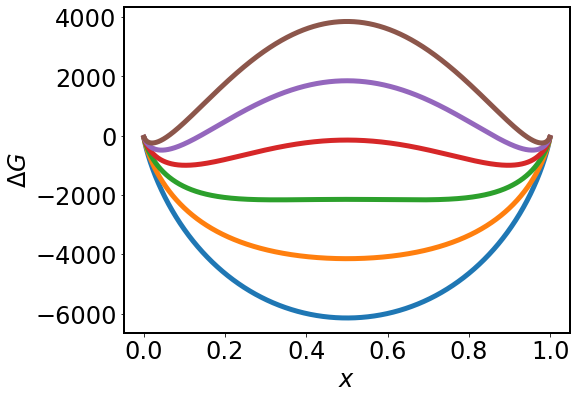

In [17]:
# These are matplotlib.pyplot settings; optional but helpful!
plt.rcParams.update({'figure.figsize':(8,6), 'font.size':24, \
                     'lines.linewidth':5, 'axes.linewidth':2})

# ---------------------- #
# YOUR CODE HERE

# ---------------------- #

What happens when you change $\beta$ or $T$? Can you rationalize the behavior?

--------

## Conclusion
I hope this notebook gave you some Python practice with an application to the regular solution model. If you have any remaining questions or ideas for this and other modules, please don't hesitate to reach out.

## Extensions
How can you change the code so that it plots the free energy curves for several different *temperatures* instead?


## Answers
If you found yourself stuck at certain points, I provide some sample answers [here](https://github.com/enze-chen/learning_modules/blob/master/data/answers.md#Regular_solution_plot).